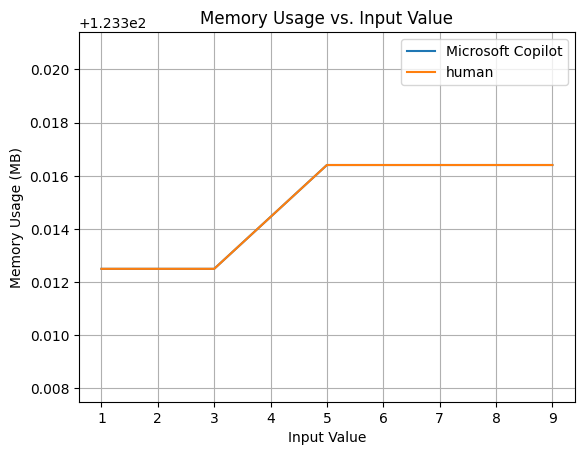

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage
import random
def flatten1(lst):
    """Flatten a nested list.

    Args:
        lst: A list that may contain nested lists.

    Returns:
        A flattened list.
    """
    if not isinstance(lst, list):
        return lst
    else:
        result = []
        for i in lst:
            if isinstance(i, list):
                result += flatten1(i)
            else:
                result.append(i)
        return result

def flatten2(lst: list) -> list:
    '''
    function that makes one list of items from list of lists
    
    >>> flatten([2, [2, 3, [2, 3]]])
    [2, 2, 3, 2, 3]
    >>> flatten(['wow', [2,[[]]], [True]])
    ['wow', 2, True]
    >>> flatten(3)
    3
    >>> flatten([1, [[[[[]], 4.0], "Hello"], [[3]]], True])
    [1, 4.0, 'Hello', 3, True]
    >>> flatten([[1, [], 4.0], [3]])
    [1, 4.0, 3]
    >>> flatten([[1, [[]]], [3]])
    [1, 3]
    '''
    if isinstance(lst, list):
        check_lst = lst[:]
        for i, item in enumerate(lst):
            if isinstance(item, list):
                i = i + len(lst) - len(check_lst)
                if not flatten2(item):
                    lst = lst[:i] + lst[i+1:]
                else:
                    lst = lst[:i] + flatten2(item) + lst[i+1:]
    return lst


def memory_test():

    # Memory usage container for each input value
    mem_usages_1 = []
    mem_usages_2 = []
    test_sizes = []
    # Measure memory usage for each input value
    for m in range(1, 10, 2):
        test_sizes.append(m)
        mem_usage = memory_usage((flatten1, ([[[[[i]]]] for i in range(m)],), {}))
        mem_usages_1.append(mem_usage[-1])  # Take the maximum memory usage from the list
        mem_usage = memory_usage((flatten2, ([[[[[i]]]] for i in range(m)],), {}))
        mem_usages_2.append(mem_usage[-1])  # Take the maximum memory usage from the list

    # Plot the results
    plt.plot(test_sizes, mem_usages_1, label = 'Microsoft Copilot')
    plt.plot(test_sizes, mem_usages_2, label = 'human')
    plt.title('Memory Usage vs. Input Value')
    plt.xlabel('Input Value')
    plt.ylabel('Memory Usage (MB)')
    plt.ylim(min(mem_usages_1+mem_usages_2) - 0.005, max(mem_usages_1+mem_usages_2) + 0.005)
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == '__main__':    
    memory_test()